In [1]:
import pandas as pd 
file_path = "covid_19_clean_complete (1).csv"
df = pd.read_csv(file_path)

# Display first few rows
print(df.head())

  Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa  


In [2]:
# Check column names and data types
print(df.info())

# Get basic statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB
None
                Lat          Long     Confirmed         Deaths     Recovered  \
count  49068.000000  49068.000000  4.906800e+04   49068.000000  4.906800e+04   
mean      21.433730     23.528236  1.688490e+04     884.179160  7.915713e+03   
std       24.950320     70.442740  1.273002e

In [3]:
# Fill missing values in 'Province/State' with 'Unknown'
df['Province/State'] = df['Province/State'].fillna('Unknown')

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Verify again
print(df.isnull().sum())

Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
dtype: int64


In [4]:
# Group by Country and get max Confirmed cases
country_cases = df.groupby('Country/Region')['Confirmed'].max().sort_values(ascending=False)
print(country_cases.head(10))

Country/Region
US                4290259
Brazil            2442375
India             1480073
Russia             816680
South Africa       452529
Mexico             395489
Peru               389717
Chile              347923
United Kingdom     300111
Iran               293606
Name: Confirmed, dtype: int64


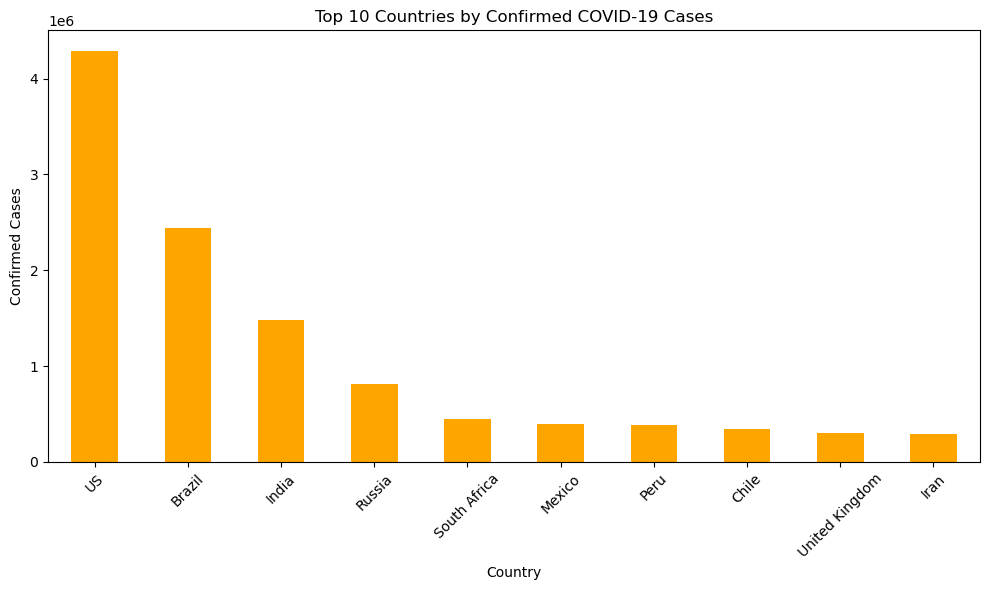

In [5]:
import matplotlib.pyplot as plt

# Top 10 countries with most confirmed cases
top_countries = country_cases.head(10)

plt.figure(figsize=(10,6))
top_countries.plot(kind='bar', color='orange')
plt.title('Top 10 Countries by Confirmed COVID-19 Cases')
plt.xlabel('Country')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
# Filter data for India
india_df = df[df['Country/Region'] == 'India']

# Group by Date and sum all states/provinces
india_daily = india_df.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum()

# Show the latest few rows
print(india_daily.tail())

            Confirmed  Deaths  Recovered
Date                                    
2020-07-23    1288108   30601     817209
2020-07-24    1337024   31358     849432
2020-07-25    1385635   32060     885573
2020-07-26    1435616   32771     917568
2020-07-27    1480073   33408     951166


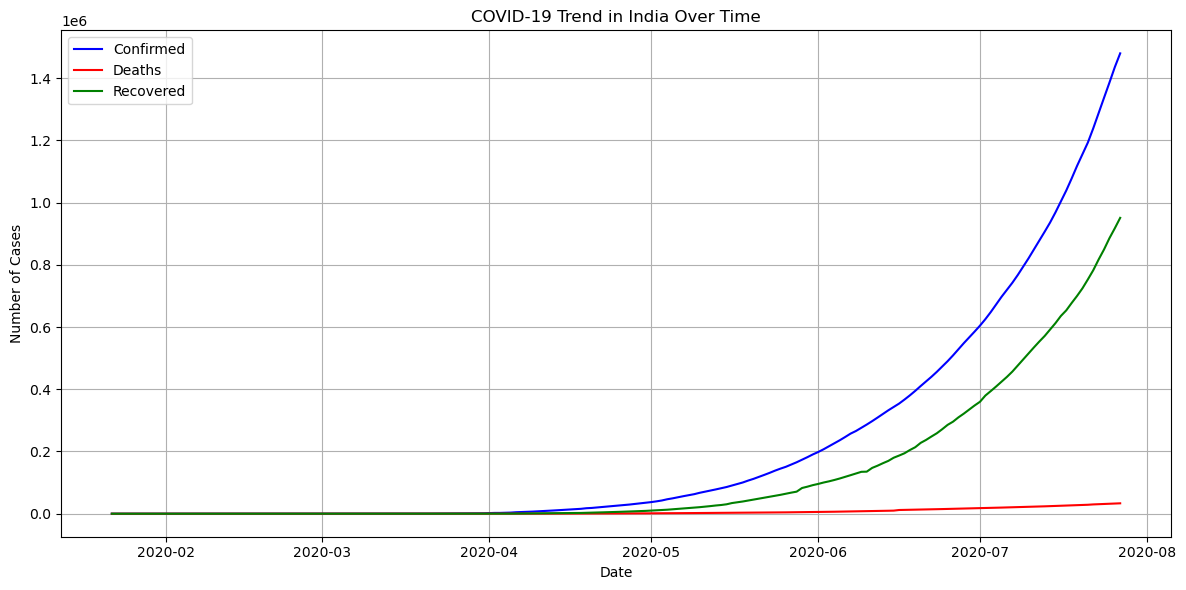

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

# Plot confirmed, deaths, recovered
plt.plot(india_daily.index, india_daily['Confirmed'], label='Confirmed', color='blue')
plt.plot(india_daily.index, india_daily['Deaths'], label='Deaths', color='red')
plt.plot(india_daily.index, india_daily['Recovered'], label='Recovered', color='green')

plt.title('COVID-19 Trend in India Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

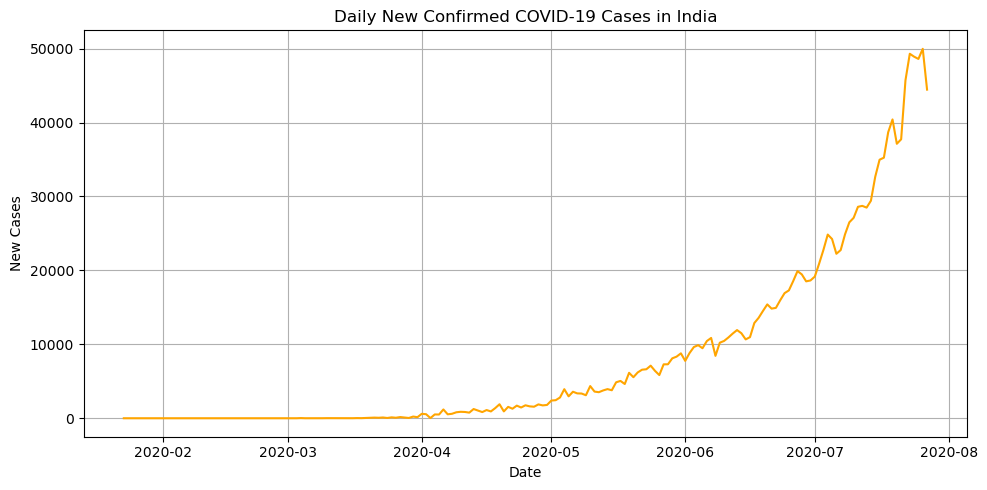

In [8]:
# Calculate daily new cases
india_daily['New Confirmed'] = india_daily['Confirmed'].diff()
india_daily['New Deaths'] = india_daily['Deaths'].diff()
india_daily['New Recovered'] = india_daily['Recovered'].diff()

# Plot daily new confirmed cases
plt.figure(figsize=(10,5))
plt.plot(india_daily.index, india_daily['New Confirmed'], label='Daily New Cases', color='orange')
plt.title('Daily New Confirmed COVID-19 Cases in India')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.grid(True)
plt.tight_layout()
plt.show()